In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from patsy import dmatrices
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
import sys
sys.setrecursionlimit(10000)

In [3]:
!pip install git+https://github.com/madrury/py-glm.git
from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Exponential

  Cloning https://github.com/madrury/py-glm.git to /tmp/pip-req-build-ahg8fn10
  Stored in directory: /tmp/pip-ephem-wheel-cache-5jmn3zcs/wheels/ba/f8/77/41a1cc9756ab50434bbadffdf60a20742fc01bfd5ea3e056eb
Successfully built py-glm


In [0]:
linear_model = GLM(family=Gaussian())
logistic_model = GLM(family=Bernoulli())
poisson_model = GLM(family=Poisson())
exponential_model = GLM(family=Exponential())

In [0]:
clean=pd.read_csv('cleaned.csv')
clean.head()

In [0]:
clean.columns = ['index', 'cancel','year', 'zip','color','age','len','credit','coverage','dwelling','premium','channel','gender','marital','adults','children','tenure','claim','state']

In [0]:
clean_color = pd.get_dummies(clean['color'])
clean_credit = pd.get_dummies(clean['credit'])
clean_coverage = pd.get_dummies(clean['coverage'])
clean_dwelling = pd.get_dummies(clean['dwelling'])
clean_channel = pd.get_dummies(clean['channel'])
clean_gender = pd.get_dummies(clean['gender'])
clean_state = pd.get_dummies(clean['state'])
clean = clean.join(clean_color)
clean = clean.join(clean_credit)
clean = clean.join(clean_coverage)
clean = clean.join(clean_dwelling)
clean = clean.join(clean_channel)
clean = clean.join(clean_gender)
clean = clean.join(clean_state)
clean.head()

In [0]:
clean2013=clean.loc[clean['year'] == 2013]
clean2014=clean.loc[clean['year'] == 2014]
clean2015=clean.loc[clean['year'] == 2015]
clean2016=clean.loc[clean['year'] == 2016]

In [0]:
list(clean)

In [0]:
logistic_model=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim",family=sm.families.Binomial(), data=clean).fit()
logistic_model.summary()

### **Calculate Overall AUC and Yearwise AUC**

In [0]:
logistic_model=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean).fit()
logistic_model.summary()

In [0]:
#logistic_model=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + red + white + yellow + high + medium + B + C + House + Tenant + Online + Phone + M + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean).fit()
#logistic_model.summary()

In [0]:
y_true = clean['cancel']
y_scores = logistic_model.predict()
roc_auc_score(y_true, y_scores)

In [0]:
logistic_model2013=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean2013).fit()
logistic_model2013.summary()

In [0]:
y_true2013 = clean2013['cancel']
y_scores2013 = logistic_model2013.predict()
roc_auc_score(y_true2013, y_scores2013)

In [0]:
logistic_model2014=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean2014).fit()
logistic_model2014.summary()

In [0]:
y_true2014 = clean2014['cancel']
y_scores2014 = logistic_model2014.predict()
roc_auc_score(y_true2014, y_scores2014)

In [0]:
logistic_model2015=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean2015).fit()
logistic_model2015.summary()

In [0]:
y_true2015 = clean2015['cancel']
y_scores2015 = logistic_model2015.predict()
roc_auc_score(y_true2015, y_scores2015)

In [0]:
logistic_model2016=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean2016).fit()
logistic_model2016.summary()

In [0]:
y_true2016 = clean2016['cancel']
y_scores2016 = logistic_model2016.predict()
roc_auc_score(y_true2016, y_scores2016)

### Model Modification (Standardize)

In [0]:
scaler=StandardScaler()
clean_standardize=clean

In [0]:
scaler.fit(clean[['premium','adults','children','tenure','age','len']])
standardized=scaler.transform(clean[['premium','adults','children','tenure','age','len']])

In [0]:
standardized=pd.DataFrame(standardized,columns=['normalized_premium','normalized_adults','normalized_children','normalized_tenure','normalized_age','normalized_len'])

In [0]:
clean_standardize=pd.concat([clean_standardize,standardized], axis = 1)

In [0]:
logistic_model_normal=sm.formula.glm(formula="cancel ~ age + len + normalized_premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA",family=sm.families.Binomial(), data=clean_standardize).fit()
logistic_model_normal.summary()

In [0]:
y_true_normal = clean_standardize['cancel']
y_scores_normal = logistic_model_normal.predict()
roc_auc_score(y_true_normal, y_scores_normal)

### Model Modification (Interaction)

In [0]:
clean_interaction = clean
clean_inter = clean[['age' , 'len' , 'premium' , 'marital' , 'adults' , 'children' , 'tenure' , 'claim' , 'blue' , 'red' , 'white', 'yellow' , 'low' , 'high' , 'medium', 'A' , 'B' , 'C' , 'Condo' , 'House' , 'Tenant' , 'Broker' , 'Online' , 'Phone' , 'F' ,'M' , 'AZ' , 'CO' , 'IA' , 'PA' , 'VA' , 'WA']]
clean_inter.head()

In [0]:
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
cov_inter = interaction.fit_transform(clean_inter)

In [0]:
cov_inter_df = pd.DataFrame(cov_inter)
cov_inter_df.head()

In [0]:
cov_inter_clean=pd.concat([clean_inter,cov_inter_df],axis=1)
cov_inter_clean.head()

In [0]:
cov_inter_clean.columns.astype(str)


In [0]:
all_columns = "+".join(str(v) for v in cov_inter_clean.columns)

In [0]:
my_formula = "cancel~" + all_columns

In [0]:
clean_interaction['cancel'] = clean['cancel']

In [0]:
logistic_model_inter=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA +WA + 0",family=sm.families.Binomial(), data=clean_interaction).fit()
logistic_model_inter.summary()

In [0]:
y_true_inter = clean_interaction['cancel']
y_scores_inter = logistic_model_inter.predict()
roc_auc_score(y_true_inter, y_scores_inter)

In [0]:
logistic_model_inter=sm.formula.glm(formula=my_formula,family=sm.families.Binomial(), data=clean_interaction).fit()
logistic_model_inter.summary()

In [0]:
logistic_model_inter=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA +WA + 0",family=sm.families.Binomial(), data=clean_interaction).fit()
logistic_model_inter.summary()

In [0]:
y_true_inter = clean_standardize['cancel']
y_scores_inter = logistic_model_inter.predict()
roc_auc_score(y_true_inter, y_scores_inter)

### **Model Modification (PCA in GLM)**

In [0]:
clean_cov=clean[['age' , 'len' , 'premium' , 'marital' , 'adults' , 'children' , 'tenure' , 'claim' , 'blue' , 'red' , 'white', 'yellow' , 'low' , 'high' , 'medium', 'A' , 'B' , 'C' , 'Condo' , 'House' , 'Tenant' , 'Broker' , 'Online' , 'Phone' , 'F' ,'M' , 'AZ' , 'CO' , 'IA' , 'PA' , 'VA' , 'WA']]

In [0]:
clean_cov.head()
clean_cov.dtypes

age         float64
len         float64
premium     float64
marital     float64
adults      float64
children    float64
tenure      float64
claim       float64
blue          uint8
red           uint8
white         uint8
yellow        uint8
low           uint8
high          uint8
medium        uint8
A             uint8
B             uint8
C             uint8
Condo         uint8
House         uint8
Tenant        uint8
Broker        uint8
Online        uint8
Phone         uint8
F             uint8
M             uint8
AZ            uint8
CO            uint8
IA            uint8
PA            uint8
VA            uint8
WA            uint8
dtype: object

In [0]:
pca = PCA()
clean_pca = clean_cov.values

In [0]:
pca.fit(clean_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca_clean = pca.transform(clean_pca)

In [0]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range (1,len(per_var)+1)]

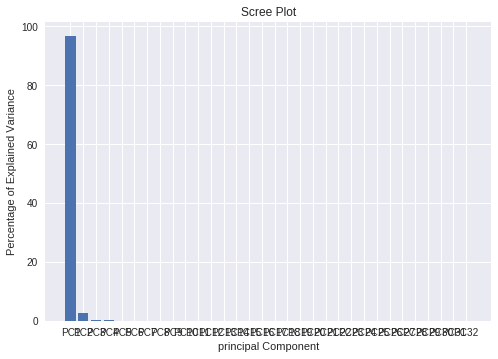

In [0]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('principal Component')
plt.title('Scree Plot')
plt.show()

In [0]:
cov_pca=pd.DataFrame(pca_clean)
cov_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,50.618824,-5.054960,-5.342488,2.945038,-1.647910,-0.131242,0.731831,-0.559657,-0.703303,-0.570520,...,-0.067537,-0.124903,-0.124722,-4.900356e-16,-1.343311e-16,8.622327e-16,7.583364e-17,-8.591759e-16,-6.681546e-16,-4.665030e-15
1,9.457391,-2.245914,-4.321908,1.921458,-1.628890,2.865887,0.741267,-0.526419,0.688810,0.566547,...,-0.072595,-0.076101,-0.036195,-1.707253e-16,2.973352e-16,-4.618423e-17,2.252314e-16,-3.630567e-16,-2.341459e-16,-7.035363e-16
2,-2.804203,2.110568,-1.685737,-1.120710,-1.810278,-1.134230,-0.669864,0.874313,0.726793,-0.280909,...,-0.143578,-0.062602,-0.051455,6.172764e-17,8.309688e-17,-1.459308e-16,1.142091e-16,-8.550090e-17,2.099433e-16,3.095422e-16
3,79.150423,4.908686,-9.200348,9.227777,-1.777876,2.871343,-0.665766,0.885463,0.730745,-0.213139,...,-0.103220,-0.130219,-0.037294,-2.557268e-16,4.829506e-16,1.518536e-15,5.869795e-17,-1.612058e-15,-2.121525e-15,-7.489775e-15
4,32.491144,-9.646515,4.723194,0.965203,2.402095,-0.133364,-0.684315,-0.555451,-0.671406,-0.271766,...,-0.097943,1.048693,-0.031991,-4.105508e-16,-2.222145e-16,6.346947e-16,-2.327356e-16,-7.655125e-16,-4.978239e-16,-3.388888e-15


In [0]:
pcaappend=cov_pca.iloc[:,0:4]
pcaappend.columns = ['PC1','PC2','PC3', 'PC4']
pcaappend.head()

,PC1,PC2,PC3,PC4
0,50.618824,-5.054960,-5.342488,2.945038
1,9.457391,-2.245914,-4.321908,1.921458
2,-2.804203,2.110568,-1.685737,-1.120710
3,79.150423,4.908686,-9.200348,9.227777
4,32.491144,-9.646515,4.723194,0.965203


In [0]:
clean_pcacov=pd.concat([clean,pcaappend],axis=1)
clean_pcacov.head()

,index,cancel,year,zip,color,age,len,credit,coverage,dwelling,...,AZ,CO,IA,PA,VA,WA,PC1,PC2,PC3,PC4
0,0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,...,0,0,0,0,0,1,50.618824,-5.054960,-5.342488,2.945038
1,1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,...,1,0,0,0,0,0,9.457391,-2.245914,-4.321908,1.921458
2,2,0,2013,80021.0,white,45.0,14.000000,high,A,House,...,0,1,0,0,0,0,-2.804203,2.110568,-1.685737,-1.120710
3,3,0,2013,85002.0,red,45.0,24.366136,high,A,House,...,1,0,0,0,0,0,79.150423,4.908686,-9.200348,9.227777
4,4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,...,0,0,1,0,0,0,32.491144,-9.646515,4.723194,0.965203


In [0]:
logistic_model_pca=sm.formula.glm(formula="cancel ~ age + len + premium + marital + adults + children + tenure + claim + blue + red + white + yellow + low + high + medium + A + B + C + Condo + House + Tenant + Broker + Online + Phone + F + M + AZ + CO + IA + PA + VA + WA+PC1+PC2+PC3",family=sm.families.Binomial(), data=clean_pcacov).fit()
logistic_model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cancel   No. Observations:              1025272
Model:                            GLM   Df Residuals:                  1025246
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -5.0362e+05
Date:                Mon, 18 Mar 2019   Deviance:                   1.0072e+06
Time:                        19:33:20   Pearson chi2:                 1.02e+06
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.623e-07   4.56e-08      5.751      0.000    1.73e-07    3.52e-07
age           -0.0118      0.000    -72.313      0.000      -0.012      -0.011
len           -0.0221      0.001    -36.869      0.000      -0.023      -0.021
premium       -0.0003    1.3e-05    -22.987      0.000      -0.000      -0.000
marital       -0.3756      0.006    -62.993      0.000      -0.387      -0.364
adults         0.0800      0.002     41.466      0.000       0.076       0.084
children       0.1263      0.001    115.130      0.000       0.124       0.128
tenure         0.0175      0.000     64.235      0.000       0.017       0.018
claim          0.3975      0.006     67.147      0.000       0.386       0.409
blue           0.0016      0.004      0.361      0.718      -0.007       0.010
red           -0.0049      0.005     -1.092      0.275      -0.014       0.004
white          0.0017      0.004      0.426      0.670      -0.006       0.010
yellow         0.0016      0.006      0.254      0.800      -0.011       0.014
low            0.7205      0.004    179.502      0.000       0.713       0.728
high          -0.6730      0.003   -201.717      0.000      -0.679      -0.666
medium        -0.0476      0.004    -12.241      0.000      -0.055      -0.040
A             -0.0603      0.004    -16.978      0.000      -0.067      -0.053
B             -0.0073      0.004     -1.881      0.060      -0.015       0.000
C              0.0676      0.003     20.199      0.000       0.061       0.074
Condo         -0.0077      0.004     -1.963      0.050      -0.015   -1.09e-05
House         -0.0352      0.003    -10.292      0.000      -0.042      -0.029
Tenant         0.0430      0.004     10.368      0.000       0.035       0.051
Broker        -0.5085      0.004   -134.356      0.000      -0.516      -0.501
Online         0.1388      0.006     24.793      0.000       0.128       0.150
Phone          0.3698      0.004     94.912      0.000       0.362       0.377
F             -0.0014      0.002     -0.549      0.583      -0.006       0.003
M              0.0014      0.002      0.549      0.583      -0.003       0.006
AZ             0.0104      0.005      2.117      0.034       0.001       0.020
CO            -0.3438      0.006    -61.575      0.000      -0.355      -0.333
IA            -0.1000      0.005    -21.102      0.000      -0.109      -0.091
PA            -0.5865      0.006    -91.016      0.000      -0.599      -0.574
VA             1.0043      0.008    121.163      0.000       0.988       1.021
WA             0.0155      0.006      2.394      0.017       0.003       0.028
PC1           -0.0005   3.43e-05    -15.603      0.000      -0.001      -0.000
PC2           -0.0099      0.000    -95.742      0.000      -0.010      -0.010
PC3           -0.0171      0.000    -59.872      0.000      -0.018      -0.017
==============================================================================
""

In [0]:
y_true_pca = clean_pcacov['cancel']
y_scores_pca = logistic_model_pca.predict()
roc_auc_score(y_true_pca, y_scores_pca)

0.7263643193606434